# Homework 5
# Margaret Doyle
# margaret.doyle@berkeley.edu

## 1) Use the data supplied of airport codes (ICAO_airports.csv) and top airports (op_airports.csv) to make a table of 50 most travelled airports in the US and containing relevant information, like name, wikipedia link, latitude, longitude

In [8]:
import sqlite3
import pandas as pd

df1 = pd.read_csv('/Users/yyk_lab/Downloads/ay250-hw/python-ay250-homework/python-seminar/Homeworks/hw_5/hw_5_data/ICAO_airports.csv')
df2 = pd.read_csv('/Users/yyk_lab/Downloads/ay250-hw/python-ay250-homework/python-seminar/Homeworks/hw_5/hw_5_data/top_airports.csv')

#Make database connection and cursor 
connection = sqlite3.connect('top50airports.db')
cursor = connection.cursor()

#Create airports table with columns for name, wiki_link, lat and long
sql_cmd ='''CREATE TABLE IF NOT EXISTS topairports (name text, iata text, link text, lat float, long float)'''

#execute query
cursor.execute(sql_cmd)



In [9]:
df1 = df1.where(pd.notnull(df1), None)
df2 = df2.where(pd.notnull(df2), None)

#Store information to put into table 
name = []
link = []
lat = []
long = []
iata=[]

#Prepare data for table 
for x, row, in df2.iterrows():
    name.append(df2['Airport'].iloc[x])
    iata.append(df2['IATA'].iloc[x])
    try:
        link.append(df1[df1['iata_code'] == df2['IATA'].iloc[x]]['wikipedia_link'].iloc[0])
        lat.append(df1[df1['iata_code'] == df2['IATA'].iloc[x]]['latitude_deg'].iloc[0])
        long.append(df1[df1['iata_code'] == df2['IATA'].iloc[x]]['longitude_deg'].iloc[0])
    except IndexError: 
        link.append('None')
        lat.append('None')
        long.append('None')
        
data = {'name': name ,'iata': iata, 'link': link, 'lat':lat, 'long':long}
df_ = pd.DataFrame(data)
df_['long'] = df_['long'] + 360


In [10]:
#Import dataframe to table
df_.to_sql(name='top_50_airports', con=connection)
df_

,name,iata,link,lat,long
0,Hartsfield-Jackson Atlanta International Airport,ATL,http://en.wikipedia.org/wiki/Hartsfield-Jackso...,33.636700,275.571899
1,Chicago O'Hare International Airport,ORD,http://en.wikipedia.org/wiki/O'Hare_Internatio...,41.978600,272.095200
2,Los Angeles International Airport,LAX,http://en.wikipedia.org/wiki/Los_Angeles_Inter...,33.942501,241.592003
3,Dallas/Fort Worth International Airport,DFW,http://en.wikipedia.org/wiki/Dallas-Fort_Worth...,32.896801,262.961998
4,Denver International Airport,DEN,http://en.wikipedia.org/wiki/Denver_Internatio...,39.861698,255.327003
5,John F. Kennedy International Airport,JFK,http://en.wikipedia.org/wiki/John_F._Kennedy_I...,40.639801,286.221100
6,San Francisco International Airport,SFO,http://en.wikipedia.org/wiki/San_Francisco_Int...,37.618999,237.625000
7,George Bush Intercontinental Airport,IAH,http://en.wikipedia.org/wiki/George_Bush_Inter...,29.984400,264.658600
8,McCarran International Airport,LAS,http://en.wikipedia.org/wiki/McCarran_Internat...,36.080101,244.848000
9,Phoenix Sky Harbor International Airport,PHX,http://en.wikipedia.org/wiki/Phoenix_Sky_Harbo...,33.434299,247.987999


In [11]:
#Make sure things are working correctly, 
import numpy as np
sql_cmd = """SELECT name FROM top_50_airports WHERE name LIKE 'A%' """
cursor.execute(sql_cmd)
db_info = np.array(cursor.fetchall())
db_info

array([['Austin-Bergstrom International Airport']], dtype='<U38')

## 2)  Build another table that will hold historical weather information: min/max temperature, relative humidity, and precipitation

In [12]:
#Create weatherinfo table
sql_cmd ='''CREATE TABLE weather_history (lat float, lon float, time DATE, max_temp float, min_temp float,  precip float, humidity float , iata text )'''
cursor.execute(sql_cmd)

## 3) Using the data from the xarray/netCDF4 example in class, populate the database from 1990-2000

In [13]:
import numpy as np
import xarray as xr

#Access max temp dataset
datatype = "tasmax" 

data0 = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc"
            )

#Access min temp dataset
datatype = "tasmin" 

data1 = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc"
            )

#Access precipitation dataset
datatype = "pr" 

data2 = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc"
            )

#Access humidity dataset
datatype = "huss" 

data3 = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc"
            )

#Open all four datasets
max_temp  = xr.open_dataset(data0)  
min_temp  = xr.open_dataset(data1)  
precip  = xr.open_dataset(data2)  
humid = xr.open_dataset(data3)  


# Slice data and only look between 1990 and 2000
a = max_temp.sel(
    time=slice('1990-01-01', '2001-01-01'))
b = min_temp.sel(
    time=slice('1990-01-01', '2001-01-01'))
c = precip.sel(
    time=slice('1990-01-01', '2001-01-01'))
d = humid.sel(
    time=slice('1990-01-01', '2001-01-01'))


In [14]:
#Double check I selected correct dates
print("The earliest date in the data is:", a["air_temperature"]["time"].values.min())
print("The latest date in the data is:", a["air_temperature"]["time"].values.max())    

The earliest date in the data is: 1990-01-01T00:00:00.000000000
The latest date in the data is: 2001-01-01T00:00:00.000000000


In [15]:
#Find coordinates closest to each airport. Convert weather data from each coordate into dataframe. 

from IPython.display import clear_output
import sys
i=0

for x,row in df_.iterrows():
    #Loop through all airport coordinates 
    lat = np.abs(df_['lat'].iloc[x])
    lon = np.abs(df_['long'].iloc[x])
    
    iata =  df_['iata'].iloc[x]
    
    #Select on lat and lon, closest to airport 
    maxt = a["air_temperature"].sel(lat = lat, lon = lon, method='nearest')
    df1= maxt.to_dataframe()
    
    mint = b["air_temperature"].sel(lat = lat, lon = lon, method='nearest')
    df2= mint.to_dataframe()

    prec = c["precipitation"].sel(lat = lat, lon = lon, method='nearest')
    df3= prec.to_dataframe()

    hum = d["specific_humidity"].sel(lat = lat, lon = lon, method='nearest')
    df4= hum.to_dataframe()
 
    #Add columns to 'ultimate' dataframe. 
    df1['min_temp'] = df2['air_temperature']
    df1['precip'] = df3['precipitation']
    df1['humidity'] = df4["specific_humidity"]
    df1['iata'] = iata
    
    #Drop nan value rows 
    df1 =df1.dropna(subset=['air_temperature'])
    df1 = df1.rename(columns={"air_temperature": "max_temp"})
    df = df1.reset_index() 
    
    #Get correct formatting for time 
    df['time'] = df['time'].dt.strftime('%m/%d/%Y')
   
    #Add weather info to table 
    df.to_sql('weather_history', con=connection, if_exists='append',index=False)
       
    i = i+1 
    print("%0.10f percent there" %(i / len(df_['long'].values) * 100))
    clear_output(wait =True )




100.0000000000 percent there


In [16]:
#Test run, make sure things are working properly 
import numpy as np
sql_cmd = """SELECT iata FROM weather_history where time ='01/01/1990'"""
cursor.execute(sql_cmd)
db_info = np.array(cursor.fetchall())

print(len(db_info)) # Should be equal to number of airports 
db_info

48


array([['ATL'],
       ['ORD'],
       ['LAX'],
       ['DFW'],
       ['DEN'],
       ['JFK'],
       ['SFO'],
       ['IAH'],
       ['LAS'],
       ['PHX'],
       ['CLT'],
       ['MIA'],
       ['MCO'],
       ['EWR'],
       ['DTW'],
       ['MSP'],
       ['SEA'],
       ['PHL'],
       ['BOS'],
       ['LGA'],
       ['IAD'],
       ['BWI'],
       ['FLL'],
       ['SLC'],
       ['DCA'],
       ['MDW'],
       ['SAN'],
       ['TPA'],
       ['PDX'],
       ['STL'],
       ['MCI'],
       ['MEM'],
       ['CLE'],
       ['OAK'],
       ['RDU'],
       ['BNA'],
       ['SMF'],
       ['HOU'],
       ['SNA'],
       ['AUS'],
       ['SJC'],
       ['MSY'],
       ['PIT'],
       ['SAT'],
       ['CVG'],
       ['MKE'],
       ['DAL'],
       ['IND']], dtype='<U3')

# 4) For each pair of cities/airports determine how daily change of temp high and precipitation from one 

In [17]:
from itertools import combinations
allcombos = []

#Create list of combinations 
for i in combinations(db_info,2):
    allcombos.append([i[0][0],i[1][0]])



In [18]:
from scipy.stats.stats import pearsonr
from geopy.distance import geodesic

precip_1 =[]
precip_2 =[]

corr_1_precip= []
corr_3_precip = []
corr_7_precip = []
dist_total = []
lon_dist = []

#Loop over all combos , select precip and temp data for each. Then compute correlation between each combo
for x in allcombos:
    sql_cmd = """SELECT precip FROM weather_history where iata = '%s'""" %x[0]
    cursor.execute(sql_cmd)
    db_precip_1= np.array(cursor.fetchall())
    precip_1.append(db_precip_1)
    
    sql_cmd = """SELECT precip FROM weather_history where iata = '%s'""" %x[1]
    cursor.execute(sql_cmd)
    db_precip_2= np.array(cursor.fetchall())
    precip_2.append(db_precip_2)
    
    #One day offset 
    corr, _ = pearsonr(precip_1[-1][1:,0],precip_2[-1][:-1,0] )
    corr_1_precip.append(corr)
    
    #Three day offset 
    corr, _ = pearsonr(precip_1[-1][3:,0],precip_2[-1][:-3,0] )
    corr_3_precip.append(corr)
    
    #Seven day offset 
    corr, _ = pearsonr(precip_1[-1][7:,0],precip_2[-1][:-7,0] )
    corr_7_precip.append(corr)
    
    #Select coordinates and compute distances 
    sql_cmd = """SELECT lon FROM weather_history where iata = '%s'""" %x[0]
    cursor.execute(sql_cmd)
    lon_1= np.array(cursor.fetchall())

    sql_cmd = """SELECT lat FROM weather_history where iata = '%s'""" %x[0]
    cursor.execute(sql_cmd)
    lat_1= np.array(cursor.fetchall())

    sql_cmd = """SELECT lon FROM weather_history where iata = '%s'""" %x[1]
    cursor.execute(sql_cmd)
    lon_2= np.array(cursor.fetchall())

    sql_cmd = """SELECT lat FROM weather_history where iata = '%s'""" %x[1]
    cursor.execute(sql_cmd)
    lat_2= np.array(cursor.fetchall())

    lon_dist.append(lon_1[0][0] - lon_2[0][0])
    dist_total.append(geodesic([ lat_1[0][0] ,lon_1[0][0]  ], [ lat_2[0][0],lon_2[0][0] ]).kilometers)

In [19]:
#Get same correlations for temps 
temp_1 =[]
temp_2 =[]

corr_1_temp= []
corr_3_temp = []
corr_7_temp = []

for x in allcombos:
    sql_cmd = """SELECT max_temp FROM weather_history where iata = '%s'""" %x[0]
    cursor.execute(sql_cmd)
    db_temp_1= np.array(cursor.fetchall())
    temp_1.append(db_temp_1)
    
    sql_cmd = """SELECT max_temp FROM weather_history where iata = '%s'""" %x[1]
    cursor.execute(sql_cmd)
    db_temp_2= np.array(cursor.fetchall())
    temp_2.append(db_temp_2)
    
    #1 day in advance 
    corr, _ = pearsonr(temp_1[-1][1:,0],temp_2[-1][:-1,0] )
    corr_1_temp.append(corr)
    
    #3 days in advance 
    corr, _ = pearsonr(temp_1[-1][3:,0],temp_2[-1][:-3,0] )
    corr_3_temp.append(corr)
    
    #7 days in advance 
    corr, _ = pearsonr(temp_1[-1][7:,0],temp_2[-1][:-7,0] )
    corr_7_temp.append(corr)


In [20]:
# Plot table of results for precip correlations 
i = 0
for x in allcombos:
    print(x, 'precip 1 day corr = %0.2f , precip 3 day corr = %0.2f, precip 7 day corr = %0.2f' %(corr_1_precip[i], corr_3_precip[i], corr_7_precip[i]))
    i=i+1

['ATL', 'ORD'] precip 1 day corr = 0.09 , precip 3 day corr = -0.03, precip 7 day corr = 0.01
['ATL', 'LAX'] precip 1 day corr = -0.03 , precip 3 day corr = 0.06, precip 7 day corr = 0.01
['ATL', 'DFW'] precip 1 day corr = 0.22 , precip 3 day corr = 0.03, precip 7 day corr = 0.01
['ATL', 'DEN'] precip 1 day corr = 0.05 , precip 3 day corr = 0.04, precip 7 day corr = -0.01
['ATL', 'JFK'] precip 1 day corr = -0.04 , precip 3 day corr = 0.00, precip 7 day corr = 0.00
['ATL', 'SFO'] precip 1 day corr = -0.03 , precip 3 day corr = 0.05, precip 7 day corr = 0.01
['ATL', 'IAH'] precip 1 day corr = 0.34 , precip 3 day corr = 0.03, precip 7 day corr = 0.01
['ATL', 'LAS'] precip 1 day corr = -0.02 , precip 3 day corr = 0.01, precip 7 day corr = 0.01
['ATL', 'PHX'] precip 1 day corr = 0.02 , precip 3 day corr = 0.02, precip 7 day corr = 0.04
['ATL', 'CLT'] precip 1 day corr = 0.10 , precip 3 day corr = 0.01, precip 7 day corr = 0.02
['ATL', 'MIA'] precip 1 day corr = -0.04 , precip 3 day corr = -

['FLL', 'CVG'] precip 1 day corr = -0.06 , precip 3 day corr = -0.04, precip 7 day corr = -0.01
['FLL', 'MKE'] precip 1 day corr = -0.03 , precip 3 day corr = -0.03, precip 7 day corr = 0.02
['FLL', 'DAL'] precip 1 day corr = -0.00 , precip 3 day corr = -0.00, precip 7 day corr = 0.02
['FLL', 'IND'] precip 1 day corr = -0.05 , precip 3 day corr = -0.04, precip 7 day corr = -0.01
['SLC', 'DCA'] precip 1 day corr = 0.01 , precip 3 day corr = -0.02, precip 7 day corr = -0.00
['SLC', 'MDW'] precip 1 day corr = -0.04 , precip 3 day corr = -0.01, precip 7 day corr = -0.04
['SLC', 'SAN'] precip 1 day corr = 0.28 , precip 3 day corr = 0.03, precip 7 day corr = 0.03
['SLC', 'TPA'] precip 1 day corr = -0.05 , precip 3 day corr = -0.04, precip 7 day corr = -0.03
['SLC', 'PDX'] precip 1 day corr = 0.17 , precip 3 day corr = 0.06, precip 7 day corr = 0.00
['SLC', 'STL'] precip 1 day corr = -0.03 , precip 3 day corr = -0.00, precip 7 day corr = -0.02
['SLC', 'MCI'] precip 1 day corr = -0.03 , precip

In [21]:
# Plot table of results for temp correlations 
i = 0
for x in allcombos:
    print(x, 'temp 1 day corr = %0.2f , temp 3 day corr = %0.2f, temp 7 day corr = %0.2f' %(corr_1_temp[i], corr_3_temp[i], corr_7_temp[i]))
    i=i+1

['ATL', 'ORD'] temp 1 day corr = 0.90 , temp 3 day corr = 0.85, temp 7 day corr = 0.82
['ATL', 'LAX'] temp 1 day corr = 0.58 , temp 3 day corr = 0.58, temp 7 day corr = 0.56
['ATL', 'DFW'] temp 1 day corr = 0.90 , temp 3 day corr = 0.83, temp 7 day corr = 0.78
['ATL', 'DEN'] temp 1 day corr = 0.81 , temp 3 day corr = 0.82, temp 7 day corr = 0.78
['ATL', 'JFK'] temp 1 day corr = 0.85 , temp 3 day corr = 0.82, temp 7 day corr = 0.80
['ATL', 'SFO'] temp 1 day corr = 0.61 , temp 3 day corr = 0.63, temp 7 day corr = 0.65
['ATL', 'IAH'] temp 1 day corr = 0.89 , temp 3 day corr = 0.80, temp 7 day corr = 0.77
['ATL', 'LAS'] temp 1 day corr = 0.79 , temp 3 day corr = 0.81, temp 7 day corr = 0.81
['ATL', 'PHX'] temp 1 day corr = 0.79 , temp 3 day corr = 0.81, temp 7 day corr = 0.80
['ATL', 'CLT'] temp 1 day corr = 0.91 , temp 3 day corr = 0.83, temp 7 day corr = 0.80
['ATL', 'MIA'] temp 1 day corr = 0.76 , temp 3 day corr = 0.72, temp 7 day corr = 0.72
['ATL', 'MCO'] temp 1 day corr = 0.81 , tem

['DEN', 'MSP'] temp 1 day corr = 0.86 , temp 3 day corr = 0.83, temp 7 day corr = 0.81
['DEN', 'SEA'] temp 1 day corr = 0.77 , temp 3 day corr = 0.78, temp 7 day corr = 0.76
['DEN', 'PHL'] temp 1 day corr = 0.77 , temp 3 day corr = 0.78, temp 7 day corr = 0.78
['DEN', 'BOS'] temp 1 day corr = 0.77 , temp 3 day corr = 0.77, temp 7 day corr = 0.77
['DEN', 'LGA'] temp 1 day corr = 0.77 , temp 3 day corr = 0.78, temp 7 day corr = 0.78
['DEN', 'IAD'] temp 1 day corr = 0.76 , temp 3 day corr = 0.77, temp 7 day corr = 0.77
['DEN', 'BWI'] temp 1 day corr = 0.77 , temp 3 day corr = 0.78, temp 7 day corr = 0.78
['DEN', 'FLL'] temp 1 day corr = 0.66 , temp 3 day corr = 0.69, temp 7 day corr = 0.70
['DEN', 'SLC'] temp 1 day corr = 0.92 , temp 3 day corr = 0.86, temp 7 day corr = 0.83
['DEN', 'DCA'] temp 1 day corr = 0.76 , temp 3 day corr = 0.77, temp 7 day corr = 0.77
['DEN', 'MDW'] temp 1 day corr = 0.82 , temp 3 day corr = 0.80, temp 7 day corr = 0.79
['DEN', 'SAN'] temp 1 day corr = 0.66 , tem

['IAH', 'AUS'] temp 1 day corr = 0.93 , temp 3 day corr = 0.81, temp 7 day corr = 0.76
['IAH', 'SJC'] temp 1 day corr = 0.62 , temp 3 day corr = 0.65, temp 7 day corr = 0.66
['IAH', 'MSY'] temp 1 day corr = 0.87 , temp 3 day corr = 0.79, temp 7 day corr = 0.76
['IAH', 'PIT'] temp 1 day corr = 0.82 , temp 3 day corr = 0.79, temp 7 day corr = 0.78
['IAH', 'SAT'] temp 1 day corr = 0.92 , temp 3 day corr = 0.80, temp 7 day corr = 0.75
['IAH', 'CVG'] temp 1 day corr = 0.85 , temp 3 day corr = 0.80, temp 7 day corr = 0.78
['IAH', 'MKE'] temp 1 day corr = 0.83 , temp 3 day corr = 0.80, temp 7 day corr = 0.79
['IAH', 'DAL'] temp 1 day corr = 0.93 , temp 3 day corr = 0.83, temp 7 day corr = 0.77
['IAH', 'IND'] temp 1 day corr = 0.85 , temp 3 day corr = 0.80, temp 7 day corr = 0.78
['LAS', 'PHX'] temp 1 day corr = 0.96 , temp 3 day corr = 0.92, temp 7 day corr = 0.88
['LAS', 'CLT'] temp 1 day corr = 0.78 , temp 3 day corr = 0.79, temp 7 day corr = 0.80
['LAS', 'MIA'] temp 1 day corr = 0.70 , tem

['PHL', 'IND'] temp 1 day corr = 0.95 , temp 3 day corr = 0.87, temp 7 day corr = 0.83
['BOS', 'LGA'] temp 1 day corr = 0.94 , temp 3 day corr = 0.86, temp 7 day corr = 0.84
['BOS', 'IAD'] temp 1 day corr = 0.93 , temp 3 day corr = 0.85, temp 7 day corr = 0.83
['BOS', 'BWI'] temp 1 day corr = 0.94 , temp 3 day corr = 0.86, temp 7 day corr = 0.84
['BOS', 'FLL'] temp 1 day corr = 0.78 , temp 3 day corr = 0.75, temp 7 day corr = 0.75
['BOS', 'SLC'] temp 1 day corr = 0.81 , temp 3 day corr = 0.83, temp 7 day corr = 0.83
['BOS', 'DCA'] temp 1 day corr = 0.93 , temp 3 day corr = 0.85, temp 7 day corr = 0.83
['BOS', 'MDW'] temp 1 day corr = 0.92 , temp 3 day corr = 0.87, temp 7 day corr = 0.84
['BOS', 'SAN'] temp 1 day corr = 0.52 , temp 3 day corr = 0.53, temp 7 day corr = 0.52
['BOS', 'TPA'] temp 1 day corr = 0.81 , temp 3 day corr = 0.76, temp 7 day corr = 0.76
['BOS', 'PDX'] temp 1 day corr = 0.72 , temp 3 day corr = 0.73, temp 7 day corr = 0.76
['BOS', 'STL'] temp 1 day corr = 0.88 , tem

['PDX', 'OAK'] temp 1 day corr = 0.80 , temp 3 day corr = 0.74, temp 7 day corr = 0.66
['PDX', 'RDU'] temp 1 day corr = 0.69 , temp 3 day corr = 0.70, temp 7 day corr = 0.71
['PDX', 'BNA'] temp 1 day corr = 0.73 , temp 3 day corr = 0.74, temp 7 day corr = 0.74
['PDX', 'SMF'] temp 1 day corr = 0.91 , temp 3 day corr = 0.86, temp 7 day corr = 0.82
['PDX', 'HOU'] temp 1 day corr = 0.71 , temp 3 day corr = 0.72, temp 7 day corr = 0.72
['PDX', 'SNA'] temp 1 day corr = 0.72 , temp 3 day corr = 0.69, temp 7 day corr = 0.64
['PDX', 'AUS'] temp 1 day corr = 0.71 , temp 3 day corr = 0.72, temp 7 day corr = 0.72
['PDX', 'SJC'] temp 1 day corr = 0.85 , temp 3 day corr = 0.79, temp 7 day corr = 0.72
['PDX', 'MSY'] temp 1 day corr = 0.69 , temp 3 day corr = 0.70, temp 7 day corr = 0.71
['PDX', 'PIT'] temp 1 day corr = 0.73 , temp 3 day corr = 0.74, temp 7 day corr = 0.74
['PDX', 'SAT'] temp 1 day corr = 0.70 , temp 3 day corr = 0.71, temp 7 day corr = 0.71
['PDX', 'CVG'] temp 1 day corr = 0.73 , tem

#  5) Plot the correlation strengths for the 10 top pairs for all three dates, for temperature and precipitation (separately) as a function of distance. Also make a plot as a function of longitude different. What trends do you see?

In [22]:
#Find top ten strengths
a = np.array(corr_1_temp)[np.argsort(np.array(corr_1_temp))[-10:]]
b = np.array(lon_dist)[np.argsort(np.array(corr_1_temp))[-10:]]
b_ = np.array(dist_total)[np.argsort(np.array(corr_1_temp))[-10:]]

c = np.array(corr_3_temp)[np.argsort(np.array(corr_3_temp))[-10:]]
d = np.array(lon_dist)[np.argsort(np.array(corr_3_temp))[-10:]]
d_ = np.array(dist_total)[np.argsort(np.array(corr_3_temp))[-10:]]

e = np.array(corr_7_temp)[np.argsort(np.array(corr_7_temp))[-10:]]
f = np.array(lon_dist)[np.argsort(np.array(corr_7_temp))[-10:]]
f_ = np.array(dist_total)[np.argsort(np.array(corr_7_temp))[-10:]]

g = np.array(corr_1_precip)[np.argsort(np.array(corr_1_precip))[-10:]]
h = np.array(lon_dist)[np.argsort(np.array(corr_1_precip))[-10:]]
h_ = np.array(dist_total)[np.argsort(np.array(corr_1_precip))[-10:]]

i = np.array(corr_3_precip)[np.argsort(np.array(corr_3_precip))[-10:]]
j = np.array(lon_dist)[np.argsort(np.array(corr_3_precip))[-10:]]
j_ = np.array(dist_total)[np.argsort(np.array(corr_3_precip))[-10:]]

k = np.array(corr_7_precip)[np.argsort(np.array(corr_7_precip))[-10:]]
l = np.array(lon_dist)[np.argsort(np.array(corr_7_precip))[-10:]]
l_ = np.array(dist_total)[np.argsort(np.array(corr_7_precip))[-10:]]

In [23]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, figsize=[10,10],sharex = True, sharey=True)

#Plotting temperature correlation as function of total distance 

axs[0].plot(b_, a, 'o' , markersize=20)
axs[0].set_title('1 day offset')

axs[1].plot(d_, c, 'o', markersize=20)
axs[1].set_title('3 day offset')


axs[2].plot(f_, e, 'o', markersize=20)
axs[2].set_title('7 day offset')
axs[2].set_xlabel('Total Distance (km)', fontsize=20)
axs[1].set_ylabel('Temperature Correlation', fontsize=20)

plt.tight_layout()

fig, axs = plt.subplots(3, figsize=[10,10],sharex = True, sharey=True)

axs[0].plot(b, a, '*' ,markersize=20)
axs[0].set_title('1 day offset')

axs[1].plot(d, c, '*', markersize=20)
axs[1].set_title('3 day offset')


axs[2].plot(f, e, '*', markersize=20)
axs[2].set_title('7 day offset')
axs[1].set_ylabel('Temperature Correlation', fontsize=20)
axs[2].set_xlabel('Longitudinal Dist (degrees)', fontsize=20)
plt.tight_layout()

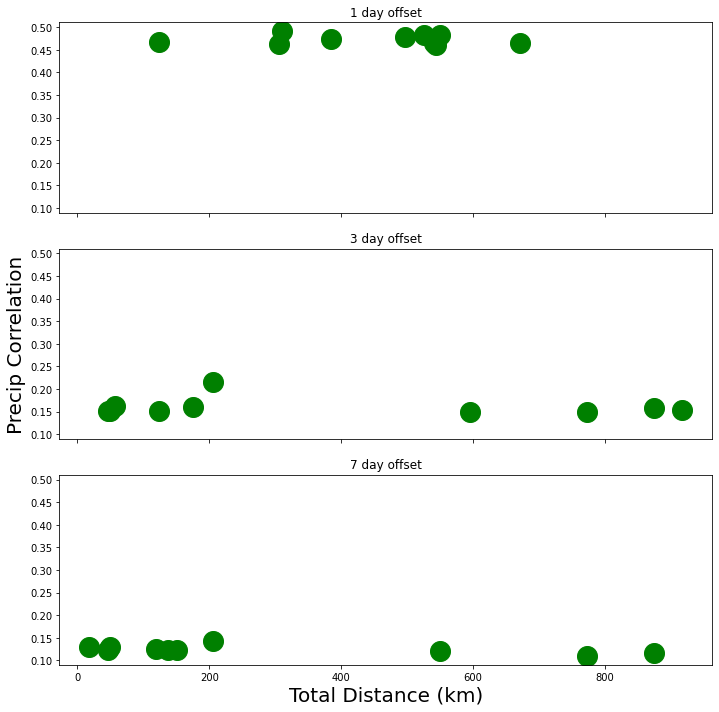

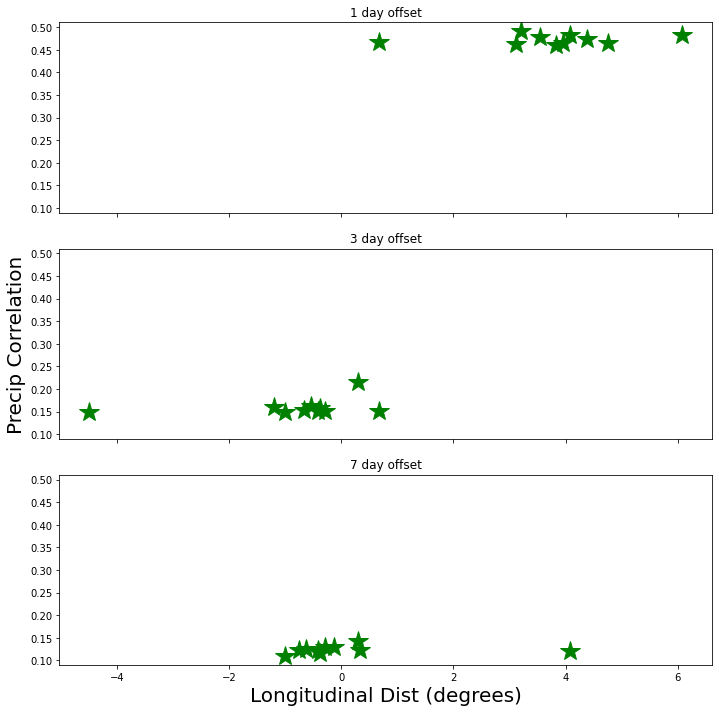

In [24]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, figsize=[10,10],sharex = True, sharey=True)

#Plotting precipitation correlation as function of total distance 

axs[0].plot(h_, g, 'go' , markersize=20)
axs[0].set_title('1 day offset')


axs[1].plot(j_, i, 'go', markersize=20)
axs[1].set_title('3 day offset')


axs[2].plot(l_, k, 'go', markersize=20)
axs[2].set_title('7 day offset')
axs[2].set_xlabel('Total Distance (km)', fontsize=20)
axs[1].set_ylabel('Precip Correlation', fontsize=20)

plt.tight_layout()

fig, axs = plt.subplots(3, figsize=[10,10],sharex = True, sharey=True)

axs[0].plot(h, g, 'g*' ,markersize=20)
axs[0].set_title('1 day offset')

axs[1].plot(j, i, 'g*', markersize=20)
axs[1].set_title('3 day offset')


axs[2].plot(l, k, 'g*', markersize=20)
axs[2].set_title('7 day offset')
axs[1].set_ylabel('Precip Correlation', fontsize=20)
axs[2].set_xlabel('Longitudinal Dist (degrees)', fontsize=20)
plt.tight_layout()

# What trends do I see ? 

Correlation coefficient for both temperature and precipitation decreases as the day-offset increases. For example, there is a much higher average precipitation correlation between pairs 1-day in advance vs. pairs 7 days in advance. This makes sense, since weather patterns have less time to disperse if you constrain the time window you are looking at. By 7 days, some weather patterns may have the chance to attenuate quite a bit, weakening the correlation. For temperature correlations specifically, both the longitudinal differrences and total distances between the highest correlated pairs are closest to 0 for the 1-day offset data. From 3 to 7 day offset data, you begin to see how airports farther apart begin to be strongly correlated. This makes sense that cities farther apart will only start to show stronger correlations at larger offsets, as it will take longer for the weather pattern to travel and reach the city. You have to take travel time into account. As looks like there is higher correlation amongst temperature than precipitation. 